__AIRCRAFT RISK ANALYSIS FOR PORTFOLIO EXPANSION__

__Executive Summary__
- This project analyzes aviation accident data to identify the lowest risk aircraft models , providing actionable insights to support safe,strategic procurement decisions for the Company's new aviation division.

__Objective:__


 Analyze aviation accident data to identify Low-risk aircraft models and translate findings into actionable insights to inform the Aviation division's purchasing strategy.

__Stakeholder__:
- Head of the Aviation Division -Will use findings to guide the decision on which Aircraft to purchase for the Company's Potfolio Expansion.

__Impact__:
- Helps the company minimize operational risks, protect investments and make a successful entry into the aviation market.

__Data Source__
- The dataset used in this project was provided by the National Transportation Safety Board (NTSB).It contains information from 1962 to 2023 about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

In [249]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [250]:
#Loading the dataset
df=pd.read_csv("AviationData.csv",nrows=100,skiprows=0)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [251]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [252]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                100 non-null    object 
 1   Investigation.Type      100 non-null    object 
 2   Accident.Number         100 non-null    object 
 3   Event.Date              100 non-null    object 
 4   Location                100 non-null    object 
 5   Country                 99 non-null     object 
 6   Latitude                2 non-null      float64
 7   Longitude               2 non-null      float64
 8   Airport.Code            44 non-null     object 
 9   Airport.Name            59 non-null     object 
 10  Injury.Severity         100 non-null    object 
 11  Aircraft.damage         99 non-null     object 
 12  Aircraft.Category       89 non-null     object 
 13  Registration.Number     100 non-null    object 
 14  Make                    100 non-null    obj

In [254]:
#determine missing values in the dataset(Null Values)
df.isnull()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,True,True,False,False,...,False,True,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,True,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [255]:
#Missing values summed per column
df.isnull().sum()

Event.Id                   0
Investigation.Type         0
Accident.Number            0
Event.Date                 0
Location                   0
Country                    1
Latitude                  98
Longitude                 98
Airport.Code              56
Airport.Name              41
Injury.Severity            0
Aircraft.damage            1
Aircraft.Category         11
Registration.Number        0
Make                       0
Model                      0
Amateur.Built              0
Number.of.Engines          1
Engine.Type                1
FAR.Description           11
Schedule                  84
Purpose.of.flight          1
Air.carrier               85
Total.Fatal.Injuries       2
Total.Serious.Injuries     3
Total.Minor.Injuries       3
Total.Uninjured            1
Weather.Condition          0
Broad.phase.of.flight      0
Report.Status              0
Publication.Date           1
dtype: int64

In [256]:
#Determine percentage of missing values per column
(df.isnull().sum() /len(df)) *100

Event.Id                   0.0
Investigation.Type         0.0
Accident.Number            0.0
Event.Date                 0.0
Location                   0.0
Country                    1.0
Latitude                  98.0
Longitude                 98.0
Airport.Code              56.0
Airport.Name              41.0
Injury.Severity            0.0
Aircraft.damage            1.0
Aircraft.Category         11.0
Registration.Number        0.0
Make                       0.0
Model                      0.0
Amateur.Built              0.0
Number.of.Engines          1.0
Engine.Type                1.0
FAR.Description           11.0
Schedule                  84.0
Purpose.of.flight          1.0
Air.carrier               85.0
Total.Fatal.Injuries       2.0
Total.Serious.Injuries     3.0
Total.Minor.Injuries       3.0
Total.Uninjured            1.0
Weather.Condition          0.0
Broad.phase.of.flight      0.0
Report.Status              0.0
Publication.Date           1.0
dtype: float64

In [257]:
#Drop accidents with 90% of data missing
df = df.dropna(axis=1,thresh=int(.90*len(df)))
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20020917X01625,Accident,ANC82DA015,1982-01-15,"NEAR NUIQSUT, AK",United States,Non-Fatal,Substantial,N1459T,De Havilland,...,Turbo Prop,Unknown,0.0,0.0,0.0,4.0,VMC,Landing,Probable Cause,15-01-1983
96,20020917X02096,Accident,FTW82FA041,1982-01-16,"HOUMA, LA",United States,Fatal(1),Destroyed,N1081H,Bell Helicopter,...,Turbo Shaft,Unknown,1.0,2.0,0.0,0.0,IMC,Cruise,Probable Cause,16-01-1983
97,20020917X02487,Accident,NYC82DA023,1982-01-16,"SWANTON, VT",United States,Non-Fatal,Substantial,N704KE,Cessna,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Go-around,Probable Cause,16-01-1983
98,20020917X02321,Accident,LAX82FVG14,1982-01-17,"DAVIS, CA",United States,Fatal(1),Destroyed,N63182,Cessna,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,17-01-1983


#GOAL 1 __Make/model Risk analysis__.

In [258]:
#Grouping by Make and model to get accident counts
Make_accidents =df.groupby("Make")["Event.Id"].count().sort_values(ascending=False)
Make_accidents

Make
Cessna               43
Piper                18
Beech                 7
Grumman               2
Rockwell              2
Bellanca              2
Boeing                2
Navion                2
Mooney                2
Maule                 1
Stinson               1
Smith                 1
Schleicher            1
Quickie               1
North American        1
Mcdonnell Douglas     1
Aerospatiale          1
Lockheed              1
Hughes                1
Air Tractor           1
Enstrom               1
Embraer               1
De Havilland          1
Curtis                1
Bell Helicopter       1
Bell                  1
Beechcraft            1
Bede Aircraft         1
Swearingen            1
Name: Event.Id, dtype: int64

In [259]:
Model_accidents =df.groupby("Model")["Event.Id"].count().sort_values(ascending=False)
Model_accidents

Model
152                   5
180                   3
172                   3
PA-28-161             2
206L-1                2
                     ..
501                   1
414A                  1
414                   1
401B                  1
WCS-222 (BELL 47G)    1
Name: Event.Id, Length: 82, dtype: int64

<AxesSubplot:xlabel='Make'>

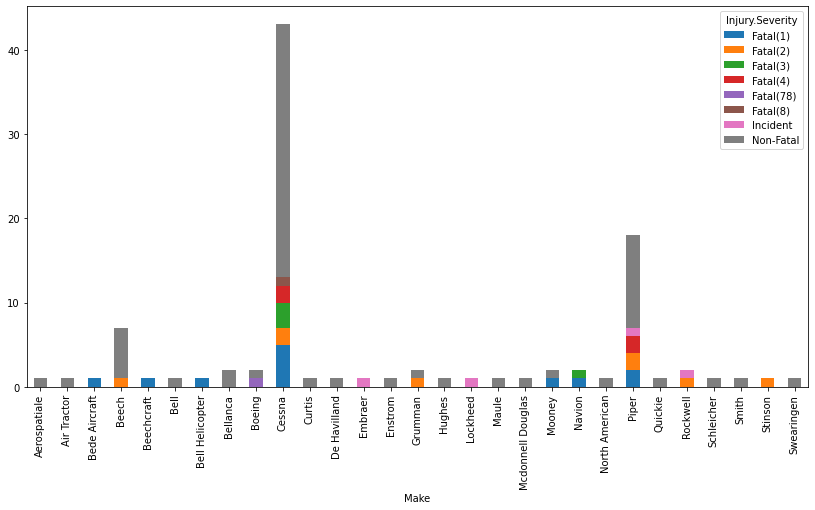

In [260]:
#Plot a bar chart to show Severity distribution
make_severity.plot(kind="bar", stacked=True, figsize=(14,7))

<function matplotlib.pyplot.show(close=None, block=None)>

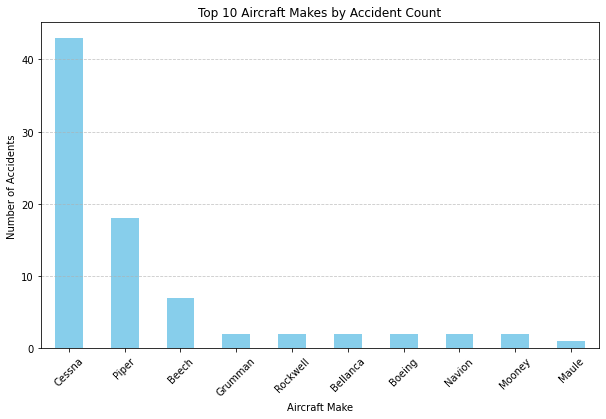

In [261]:
#Plotting Top 10 makes by number of accidents
top_makes =Make_accidents.head(10)

top_makes.plot(kind="bar",figsize=(10,6), color ="Skyblue")
plt.title("Top 10 Aircraft Makes by Accident Count")
plt.ylabel("Number of Accidents")
plt.xlabel("Aircraft Make")
plt.xticks(rotation=45)
plt.grid(axis="y",linestyle="--", alpha=0.7)
plt.show


GOAL 2 __Amateur-built vs Commercial Aircraft Risk__
- To establish whether Amateur built aircraft are riskier than commercially built ones

In [262]:
#checking ameteur counts based on ameteur built Status
amateur_counts =df["Amateur.Built"].value_counts()
amateur_counts


Amateur.Built
No     97
Yes     3
Name: count, dtype: int64

In [263]:
amateur_severity = df.groupby(["Amateur.Built","Injury.Severity"]).size().unstack(fill_value=0)
amateur_severity

Injury.Severity,Fatal(1),Fatal(2),Fatal(3),Fatal(4),Fatal(78),Fatal(8),Incident,Non-Fatal
Amateur.Built,,,,,,,,
No,11,8,4,4,1,1,4,64
Yes,1,0,0,0,0,0,0,2


<function matplotlib.pyplot.show(close=None, block=None)>

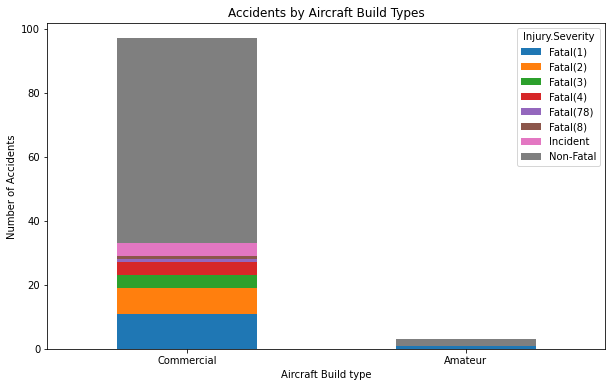

In [264]:
#Plotting 
amateur_severity.plot(kind="bar",stacked=True, figsize=(10,6))
plt.title("Accidents by Aircraft Build Types")
plt.ylabel("Number of Accidents")
plt.xlabel("Aircraft Build type") #Yes =Amateur, # No=Commercial
plt.xticks(ticks=[0,1], labels=["Commercial", "Amateur"], rotation=0)
plt.show

# Establish the relationship between the severity of the injuries, how the aeroplane is damaged and the Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured

In [265]:
# Compare the injury severity, and how the airplane was damaged to see the association with the average minor injuries in the damaged plane
df.groupby(['Injury.Severity','Aircraft.damage'])['Total.Minor.Injuries'].mean()

Injury.Severity  Aircraft.damage
Fatal(1)         Destroyed          0.090909
Fatal(2)         Destroyed          0.000000
Fatal(3)         Destroyed          0.000000
Fatal(4)         Destroyed          0.250000
Fatal(78)        Destroyed          3.000000
Fatal(8)         Destroyed          0.000000
Incident         Minor              0.000000
Non-Fatal        Destroyed          0.625000
                 Substantial        0.350877
Name: Total.Minor.Injuries, dtype: float64

In [266]:
#Compare the injury severity and how the airplane was damaged to see the association with the average fatal injuries in the damaged plane
df.groupby(['Injury.Severity','Aircraft.damage'])['Total.Fatal.Injuries'].mean()

Injury.Severity  Aircraft.damage
Fatal(1)         Destroyed           1.0
Fatal(2)         Destroyed           2.0
Fatal(3)         Destroyed           3.0
Fatal(4)         Destroyed           4.0
Fatal(78)        Destroyed          78.0
Fatal(8)         Destroyed           8.0
Incident         Minor               0.0
Non-Fatal        Destroyed           0.0
                 Substantial         0.0
Name: Total.Fatal.Injuries, dtype: float64

In [267]:
#Compare the injury severity and how the airplane was damaged to see the association with the average Uninjured in the damaged plane
df.groupby(['Injury.Severity','Aircraft.damage'])['Total.Uninjured'].mean()

Injury.Severity  Aircraft.damage
Fatal(1)         Destroyed          0.000000
Fatal(2)         Destroyed          0.000000
Fatal(3)         Destroyed          0.000000
Fatal(4)         Destroyed          0.000000
Fatal(78)        Destroyed          0.000000
Fatal(8)         Destroyed          0.000000
Incident         Minor              1.333333
Non-Fatal        Destroyed          1.000000
                 Substantial        2.465517
Name: Total.Uninjured, dtype: float64

In [268]:
# Compare the type of flight undertaken resultant  severity of the  injury vis-vis the average fatal injuries, uninjured and minor injuries by creating a pivot table to see the relationship
df.groupby(['Purpose.of.flight','Injury.Severity'])[['Total.Fatal.Injuries','Total.Uninjured','Total.Minor.Injuries']].mean()

Total.Fatal.Injuries  Total.Uninjured  \
Purpose.of.flight   Injury.Severity                                          
Business            Fatal(1)                          1.0         0.000000   
                    Fatal(3)                          3.0         0.000000   
                    Fatal(8)                          8.0         0.000000   
                    Incident                          0.0         1.000000   
                    Non-Fatal                         0.0         2.400000   
Executive/corporate Non-Fatal                         0.0         3.000000   
Ferry               Non-Fatal                         0.0         1.000000   
Instructional       Non-Fatal                         0.0         1.333333   
Personal            Fatal(1)                          1.0         0.000000   
                    Fatal(2)                          2.0         0.000000   
                    Fatal(3)                          3.0         0.000000   
                    Fatal(4)                          4.0         0.000000   
                    Incident                          0.0         1.000000   
                    Non-Fatal                         0.0         1.416667   
Unknown             Fatal(1)                          1.0         0.000000   
                    Fatal(2)                          2.0         0.000000   
                    Fatal(78)                        78.0         0.000000   
                    Incident                          0.0        75.500000   
                    Non-Fatal                         0.0         2.066667   

                                     Total.Minor.Injuries  
Purpose.of.flight   Injury.Severity                        
Business            Fatal(1)                     1.000000  
                    Fatal(3)                     0.000000  
                    Fatal(8)                     0.000000  
                    Incident                     0.000000  
                    Non-Fatal                    0.000000  
Executive/corporate Non-Fatal                    0.000000  
Ferry               Non-Fatal                    0.000000  
Instructional       Non-Fatal                    0.000000  
Personal            Fatal(1)                     0.000000  
                    Fatal(2)                     0.000000  
                    Fatal(3)                     0.000000  
                    Fatal(4)                     0.250000  
                    Incident                     0.000000  
                    Non-Fatal                    0.542857  
Unknown             Fatal(1)                     0.000000  
                    Fatal(2)                     0.000000  
                    Fatal(78)                    3.000000  
                    Incident                     0.000000  
                    Non-Fatal                    0.333333

# Establish the relationship between the weather conditions and injuries recorded

In [269]:
df.groupby(['Weather.Condition','Injury.Severity'])[['Total.Fatal.Injuries','Total.Uninjured','Total.Minor.Injuries']].mean()

Total.Fatal.Injuries  Total.Uninjured  \
Weather.Condition Injury.Severity                                          
IMC               Fatal(1)                          1.0         0.000000   
                  Fatal(2)                          2.0         0.000000   
                  Fatal(3)                          3.0         0.000000   
                  Fatal(4)                          4.0         0.000000   
                  Fatal(78)                        78.0         0.000000   
                  Fatal(8)                          8.0         0.000000   
                  Non-Fatal                         0.0         1.125000   
UNK               Fatal(2)                          2.0         0.000000   
                  Fatal(4)                          4.0         0.000000   
                  Incident                          0.0       149.000000   
                  Non-Fatal                         0.0         0.000000   
VMC               Fatal(1)                          1.0         0.000000   
                  Fatal(2)                          2.0         0.000000   
                  Fatal(3)                          3.0         0.000000   
                  Fatal(4)                          4.0         0.000000   
                  Incident                          0.0         1.333333   
                  Non-Fatal                         0.0         2.535714   

                                   Total.Minor.Injuries  
Weather.Condition Injury.Severity                        
IMC               Fatal(1)                     0.000000  
                  Fatal(2)                     0.000000  
                  Fatal(3)                     0.000000  
                  Fatal(4)                     0.500000  
                  Fatal(78)                    3.000000  
                  Fatal(8)                     0.000000  
                  Non-Fatal                    0.500000  
UNK               Fatal(2)                     0.000000  
                  Fatal(4)                     0.000000  
                  Incident                     0.000000  
                  Non-Fatal                    1.500000  
VMC               Fatal(1)                     0.250000  
                  Fatal(2)                     0.000000  
                  Fatal(3)                     0.000000  
                  Fatal(4)                     0.000000  
                  Incident                     0.000000  
                  Non-Fatal                    0.327273

# Establish the relationship between the make of the aeroplane,engine type and the injuries recorded

In [271]:
df.groupby(['Make','Engine.Type','Injury.Severity'])[['Total.Fatal.Injuries','Total.Uninjured','Total.Minor.Injuries']].mean()

Total.Fatal.Injuries  \
Make              Engine.Type   Injury.Severity                         
Aerospatiale      Turbo Shaft   Non-Fatal                         0.0   
Air Tractor       Reciprocating Non-Fatal                         0.0   
Bede Aircraft     Reciprocating Fatal(1)                          1.0   
Beech             Reciprocating Fatal(2)                          2.0   
                                Non-Fatal                         0.0   
Beechcraft        Reciprocating Fatal(1)                          1.0   
Bell              Turbo Shaft   Non-Fatal                         0.0   
Bell Helicopter   Turbo Shaft   Fatal(1)                          1.0   
Bellanca          Reciprocating Non-Fatal                         0.0   
Boeing            Reciprocating Non-Fatal                         0.0   
                  Turbo Fan     Fatal(78)                        78.0   
Cessna            Reciprocating Fatal(1)                          1.0   
                                Fatal(2)                          2.0   
                                Fatal(3)                          3.0   
                                Fatal(4)                          4.0   
                                Fatal(8)                          8.0   
                                Non-Fatal                         0.0   
Curtis            Reciprocating Non-Fatal                         0.0   
De Havilland      Turbo Prop    Non-Fatal                         0.0   
Embraer           Turbo Prop    Incident                          0.0   
Enstrom           Reciprocating Non-Fatal                         0.0   
Grumman           Reciprocating Fatal(2)                          2.0   
                                Non-Fatal                         0.0   
Hughes            Reciprocating Non-Fatal                         0.0   
Lockheed          Turbo Fan     Incident                          0.0   
Maule             Reciprocating Non-Fatal                         0.0   
Mcdonnell Douglas Turbo Fan     Non-Fatal                         NaN   
Mooney            Reciprocating Fatal(1)                          1.0   
                                Non-Fatal                         0.0   
Navion            Reciprocating Fatal(1)                          1.0   
                                Fatal(3)                          3.0   
North American    Reciprocating Non-Fatal                         0.0   
Piper             Reciprocating Fatal(1)                          1.0   
                                Fatal(2)                          2.0   
                                Fatal(4)                          4.0   
                                Incident                          0.0   
                                Non-Fatal                         0.0   
Quickie           Reciprocating Non-Fatal                         0.0   
Rockwell          Reciprocating Fatal(2)                          2.0   
                                Incident                          0.0   
Schleicher        Unknown       Non-Fatal                         0.0   
Smith             Reciprocating Non-Fatal                         0.0   
Stinson           Reciprocating Fatal(2)                          2.0   
Swearingen        Turbo Prop    Non-Fatal                         0.0   

                                                 Total.Uninjured  \
Make              Engine.Type   Injury.Severity                    
Aerospatiale      Turbo Shaft   Non-Fatal               6.000000   
Air Tractor       Reciprocating Non-Fatal               1.000000   
Bede Aircraft     Reciprocating Fatal(1)                0.000000   
Beech             Reciprocating Fatal(2)                0.000000   
                                Non-Fatal               2.000000   
Beechcraft        Reciprocating Fatal(1)                0.000000   
Bell              Turbo Shaft   Non-Fatal               1.000000   
Bell Helicopter   Turbo Shaft   Fatal(1)                0.000000   
Bellanca  